In [3]:
from google.colab import files # para cargar archivos
uploaded = files.upload()


Saving limon.zip to limon.zip


In [0]:
!pwd

In [0]:
import zipfile
import io  # para tener acceso a los archivos
data=zipfile.ZipFile(io.BytesIO(uploaded["limon.zip"]), "r")
data.extractall()

In [8]:
import cv2  # para reconocimiento de imagenes
import numpy as np # para vectores y matrices
import os  # para poder utilizar directorios
import matplotlib.pyplot as plt  # para poder ver graficas

ruta_hojas="/content/limon"
hojas_training=[]
img_size=5000  # resolucion de acurdo al tamaño

for img in os.listdir(ruta_hojas): # permite hacer lo mismo para c/u ima
  img=cv2.imread(os.path.join(ruta_hojas, img))
  img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_gray_resize = cv2.resize(img_gray,(img_size,img_size))
  hojas_training.append([img_gray_resize]) # en los corchetes se copia la ultima version de la imagen

print(len(hojas_training))
print(hojas_training)



26
[[array([[ 99, 101,  98, ..., 116, 116, 116],
       [ 98, 100,  99, ..., 115, 115, 115],
       [ 97, 101, 100, ..., 114, 114, 114],
       ...,
       [165, 162, 163, ..., 189, 188, 188],
       [164, 160, 162, ..., 189, 187, 187],
       [164, 159, 161, ..., 189, 187, 187]], dtype=uint8)], [array([[ 45,  43,  41, ...,  43,  42,  41],
       [ 46,  44,  41, ...,  45,  44,  43],
       [ 47,  45,  41, ...,  48,  47,  47],
       ...,
       [173, 172, 171, ..., 121, 124, 127],
       [172, 171, 170, ..., 122, 124, 126],
       [172, 171, 169, ..., 122, 124, 126]], dtype=uint8)], [array([[183, 185, 185, ..., 156, 157, 158],
       [185, 186, 186, ..., 157, 158, 159],
       [186, 188, 187, ..., 157, 159, 160],
       ...,
       [198, 199, 201, ..., 159, 158, 158],
       [199, 199, 200, ..., 159, 158, 158],
       [200, 200, 200, ..., 159, 159, 159]], dtype=uint8)], [array([[160, 156, 151, ..., 255, 255, 255],
       [164, 160, 155, ..., 255, 255, 255],
       [167, 163, 159, ..., 

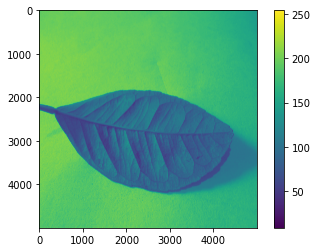

In [29]:
plt.figure()
plt.imshow(np.squeeze(hojas_training[14])) # permite visualizar las distrubiciones de los pixeles
plt.colorbar()
#plt.grid(false)
plt.show()



In [0]:
# no se para que sirve
from PIL import Image
from matplotlib import pyplot as plt
from collections import Counter
from scipy import ndimage as ndi
from skimage import feature
import scipy.misc
import numpy as np
import statistics
import random
import scipy
import time
import cv2

"""NEGATIVO DE LA IMAGEN A COLOR"""
def negativo_color(im):
    tiempoIn = time.time()
    ruta = "/content/hojas1"
   # ruta = ("/content/hojas1/2.png" + im)
    im = Image.open(ruta)
    im.show()
    im5 = im
    i = 0
    while i < im5.size[0]:
        j = 0
        while j < im5.size[1]:
            r, g, b = im5.getpixel((i, j))
            rn = 255 - r
            gn = 255 - g
            bn = 255 - b
            pixel = tuple([rn, gn, bn])
            im5.putpixel((i, j), pixel)
            j+=1
        i+=1
    im5.show()
    tiempoFin = time.time()
    print('El Proceso Tardo: ', tiempoFin - tiempoIn, ' Segundos')
    plt.figure()
    plt.imshow(np.squeeze(hojas_training[2])) # permite visualizar las distrubiciones de los pixeles
    plt.colorbar()
    plt.show()

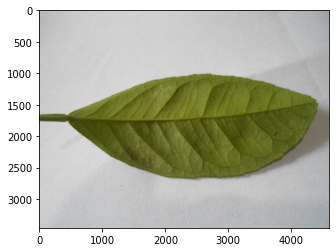

(4608, 3456) RGB MPO


In [37]:
# imagen con lena

from skimage import io
from __future__ import division   # impone aritmética no entera en la división
from PIL import Image             # funciones para cargar y manipular imágenes
import numpy as np                # funciones numéricas (arrays, matrices, etc.)
import matplotlib.pyplot as plt  

I = Image.open("SAM_0592.JPG")

# python soporta los formatos de imagen más habituales. Cargemos la image lena.jpg 
I.show() 

plt.imshow(np.asarray(I)) #Para ver la imagen con ipython
plt.show()

# Podemos obtener información sobre la imagen, 

print(I.size, I.mode, I.format)


Dimensiones de la imagen:
(3456, 4608, 3)


Text(0.5, 1.0, 'Canal Azul')

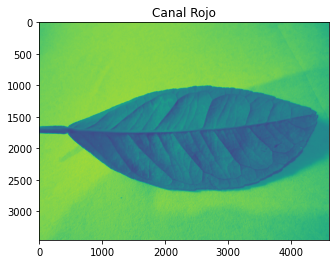

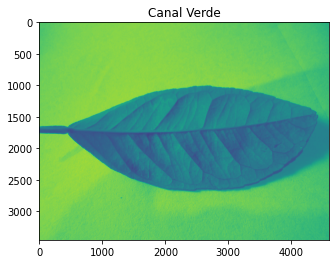

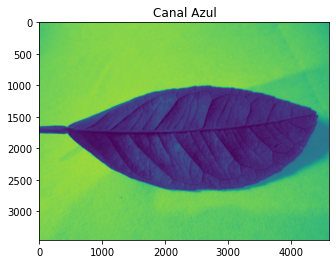

In [34]:
I=io.imread("SAM_0592.JPG")/255.0 # imread lee las imagenes con los pixeles codificados como enteros 
# en el rango 0-255. Por eso la convertimos a flotante y en el rango 0-1
plt.imshow(I) # no es necesario el vmin/vmax para imágenes a color

print("Dimensiones de la imagen:")
print(I.shape) # Genera el segndo renglo (225,225,3)

plt.imshow(I[:,:,0],vmin=0,vmax=1)
plt.title("Canal Rojo")
plt.figure()
plt.imshow(I[:,:,1],vmin=0,vmax=1)
plt.title("Canal Verde")
plt.figure()
plt.imshow(I[:,:,2],vmin=0,vmax=1)
plt.title("Canal Azul")




(4608, 3456) L None


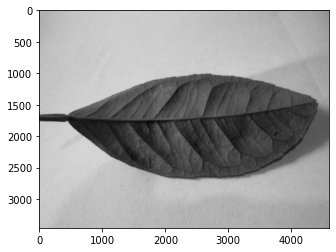

In [38]:
I1 = I.convert('L') # convierte a escala de grises 
I1.show()
print(I1.size, I1.mode, I1.format)

plt.imshow(np.asarray(I1), cmap='gray')
plt.show()

I1.save('lena_gris.tif') # grabar una imagen al disco:
